<a href="https://colab.research.google.com/github/tonyfanxinbo/Coursera_Capstone/blob/master/Week_5_code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

/bin/bash: conda: command not found
/bin/bash: conda: command not found
Folium installed
Libraries imported.


In [2]:
CLIENT_ID = 'XE4UMRQPRMQH4HPK15PHB0H0WDDELX4NCBU210Z1P1JSSSIO' # your Foursquare ID
CLIENT_SECRET = 'FP5DGAGO2PYZ45XRUKXED4PA3FI1ATZAONEFQYSGV5J41UDB' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XE4UMRQPRMQH4HPK15PHB0H0WDDELX4NCBU210Z1P1JSSSIO
CLIENT_SECRET:FP5DGAGO2PYZ45XRUKXED4PA3FI1ATZAONEFQYSGV5J41UDB


In [3]:
address = '50 Nanyang Ave, Singapore'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

1.3464600500000001 103.68284771082475


In [11]:
search_query = 'KFC'
radius = 5000
print(search_query + ' .... OK!')

KFC .... OK!


In [12]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=XE4UMRQPRMQH4HPK15PHB0H0WDDELX4NCBU210Z1P1JSSSIO&client_secret=FP5DGAGO2PYZ45XRUKXED4PA3FI1ATZAONEFQYSGV5J41UDB&ll=1.3464600500000001,103.68284771082475&v=20180604&query=KFC&radius=5000&limit=30'

In [13]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f3f1fb6b9d3034f4f1c5be0'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d16e941735',
      'name': 'Fast Food Restaurant',
      'pluralName': 'Fast Food Restaurants',
      'primary': True,
      'shortName': 'Fast Food'}],
    'hasPerk': False,
    'id': '53ca55dc498ee46b50d0f096',
    'location': {'address': 'N2.1, #01-04, NTU',
     'cc': 'SG',
     'city': 'Singapore',
     'country': 'Singapore',
     'distance': 338,
     'formattedAddress': ['N2.1, #01-04, NTU', 'Singapore'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 1.347524284419654,
       'lng': 103.68000176379424}],
     'lat': 1.347524284419654,
     'lng': 103.68000176379424},
    'name': 'KFC',
    'referralId': 'v-1597972897'},
   {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_',
       'suffix': '.

In [14]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         11 non-null     object 
 1   name                       11 non-null     object 
 2   categories                 11 non-null     object 
 3   referralId                 11 non-null     object 
 4   hasPerk                    11 non-null     bool   
 5   location.address           9 non-null      object 
 6   location.lat               11 non-null     float64
 7   location.lng               11 non-null     float64
 8   location.labeledLatLngs    11 non-null     object 
 9   location.distance          11 non-null     int64  
 10  location.cc                11 non-null     object 
 11  location.city              9 non-null      object 
 12  location.country           11 non-null     object 
 13  location.formattedAddress  11 non-null     object 
 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


In [20]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,country,formattedAddress,crossStreet,postalCode,id
0,KFC,Fast Food Restaurant,"N2.1, #01-04, NTU",1.347524,103.680002,"[{'label': 'display', 'lat': 1.347524284419654...",338,SG,Singapore,Singapore,"[N2.1, #01-04, NTU, Singapore]",NaN,NaN,53ca55dc498ee46b50d0f096
1,KFC,Fast Food Restaurant,60 Jurong West St 91,1.342705,103.692723,"[{'label': 'display', 'lat': 1.342704810612355...",1175,SG,Singapore,Singapore,"[60 Jurong West St 91 (Nanyang CC), 649040, Si...",Nanyang CC,649040,4c0f17ba2466a59304377a21
2,KFC,Fast Food Restaurant,1 Jurong West St 74 #01-02,1.348309,103.698659,"[{'label': 'display', 'lat': 1.348308916361994...",1771,SG,Singapore,Singapore,[1 Jurong West St 74 #01-02 (Gek Poh Ville CC)...,Gek Poh Ville CC,649149,4bed403fbac3c9b6e0f9fde9
3,KFC,Fast Food Restaurant,#01-30 Jurong Point (JP1),1.339842,103.706528,"[{'label': 'display', 'lat': 1.339841876840794...",2736,SG,Singapore,Singapore,[#01-30 Jurong Point (JP1) (1 Jurong West Cent...,1 Jurong West Central 2,648886,4bbc7606e4529521e4e055a4
4,KFC,Fast Food Restaurant,18 Yung Ho Rd,1.326359,103.723881,"[{'label': 'display', 'lat': 1.326358973257232...",5085,SG,Singapore,Singapore,"[18 Yung Ho Rd, 618591, Singapore]",NaN,618591,4b7a81a8f964a520342f2fe3
5,KFC,Fast Food Restaurant,501 Jurong West St. 51 #01-257,1.350543,103.719208,"[{'label': 'display', 'lat': 1.350542876865513...",4071,SG,Singapore,Singapore,"[501 Jurong West St. 51 #01-257, 640501, Singa...",NaN,640501,4bd04205caff9521236fcef0
6,KFC,Fast Food Restaurant,"#01-21, Fairprice Hub",1.327362,103.678095,"[{'label': 'display', 'lat': 1.327361769376649...",2190,SG,Singapore,Singapore,"[#01-21, Fairprice Hub (1 Joo Koon Circle), 62...",1 Joo Koon Circle,629117,549944ad498ef340b2f6ee11
7,kfc joon koon,Fried Chicken Joint,NaN,1.329501,103.675364,"[{'label': 'display', 'lat': 1.329501, 'lng': ...",2063,SG,NaN,Singapore,[Singapore],NaN,NaN,58f86aed42d8c27f0df43652
8,KFC @ Keat Hong Market,Fried Chicken Joint,NaN,1.355946,103.700210,"[{'label': 'display', 'lat': 1.355945569153438...",2201,SG,Singapore,Singapore,[Singapore],NaN,NaN,4ebd14b65c5c279832d999e8
9,Nanyang Community Centre,Building,Jurong West Street 91,1.342543,103.692643,"[{'label': 'display', 'lat': 1.342543024328800...",1174,SG,Singapore,Singapore,"[Jurong West Street 91, 649040, Singapore]",NaN,649040,4bc131a6f8219c743715b310


In [21]:
dataframe_filtered.name

0                          KFC
1                          KFC
2                          KFC
3                          KFC
4                          KFC
5                          KFC
6                          KFC
7                kfc joon koon
8       KFC @ Keat Hong Market
9     Nanyang Community Centre
10           Kfc @ Jurong West
Name: name, dtype: object

In [24]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around NTU

# add a red circle marker to represent the NTU
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='NTU',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the KFC as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

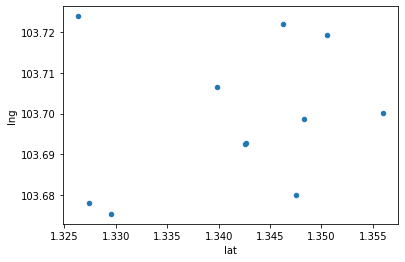

In [26]:
df = dataframe_filtered
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt # plotting library


%matplotlib inline

df.plot(x='lat',y='lng',kind='scatter')

In [27]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
df_array=np.array(df[['lat','lng']])
k_means.fit(df_array)
k_labels=pd.DataFrame(k_means.labels_)
k_labels.info()
df['cluster']=k_labels
df.groupby('cluster').count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       11 non-null     int32
dtypes: int32(1)
memory usage: 172.0 bytes


,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,country,formattedAddress,crossStreet,postalCode,id
cluster,,,,,,,,,,,,,,
0,3,3,2,3,3,3,3,3,2,3,3,1,1,3
1,2,2,2,2,2,2,2,2,1,2,2,0,2,2
2,5,5,4,5,5,5,5,5,5,5,5,3,4,5
3,1,1,1,1,1,1,1,1,1,1,1,0,1,1


In [30]:
# add markers to map

for lat, lng, name,distance,cluster in zip(df['lat'], df['lng'], df['name'], df['distance'],df['cluster']):
    
    if cluster == 0:
        label = '{}, {}'.format(name,distance)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.7,
            parse_html=False).add_to(venues_map)  
    if cluster == 1:
        label = '{}, {}'.format(name,distance)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.7,
            parse_html=False).add_to(venues_map)  
    if cluster == 2:
        label = '{}, {}'.format(name,distance)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='green',
            fill=True,
            fill_color='green',
            fill_opacity=0.7,
            parse_html=False).add_to(venues_map)  
    if cluster == 3:
        label = '{}, {}'.format(name,distance)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='purple',
            fill=True,
            fill_color='purple',
            fill_opacity=0.7,
            parse_html=False).add_to(venues_map)  
    
venues_map

In [31]:
# Generate the recommended location for the four cluster using the mean of the locations

center_location=df.groupby('cluster').mean()
center_location

,lat,lng,distance
cluster,,,
0,1.334796,103.677820,1530.333333
1,1.348407,103.720650,4219.000000
2,1.345869,103.698153,1811.400000
3,1.326359,103.723881,5085.000000


In [32]:

# color_list=['blue','red','green','purple']
# Add recommended location on the map
i=0
for lat, lng in zip(center_location['lat'],center_location['lng']):
    folium.Marker([lat,lng], popup='Recommend for Group '+ str(i)).add_to(venues_map)
    i=i+1
venues_map